In [1]:
# https://iq.opengenus.org/polynomial-regression-using-scikit-learn/

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../data")
df = pd.read_csv(os.path.join(output_dir, "combined_sentimentanalysis.csv"))
df_test = pd.read_csv(os.path.join(output_dir, "combined_sentimentanalysistest.csv"))
#df_test = pd.read_csv(os.path.join(output_dir, "figlet1599056546.006096_1599063766.431225.csv"))
df = df.drop(df[df.responsetime > 2].index)
df.pop('Time')
df_test = df_test.drop(df_test[df_test.responsetime > 2].index)
df_test.pop('Time')
df.head()

,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization
0,7.452470,0.000129,0.000000,1.484572e+04,0.006211,7.686411e+02,690.618472,1.0,7.0,0.427801,12.0,76.330988,5.045532e+10,10.168922
1,6.314931,0.056578,903.680000,7.635895e+06,0.006211,4.423151e+06,44196.825694,1.0,42.0,0.441701,12.0,76.330988,5.045532e+10,10.168922
2,9.499113,0.073244,1001.244444,9.543407e+06,0.006211,4.011359e+06,41064.000000,1.0,76.0,0.429230,12.0,13.216667,5.045532e+10,10.329697
3,6.085528,0.073156,1001.244444,9.533212e+06,0.026095,4.012145e+06,42053.311111,1.0,112.0,0.421655,12.0,13.216667,5.045532e+10,10.329697
4,9.452724,0.021956,182.044444,2.628813e+06,0.119376,3.909378e+03,3469.288889,1.0,140.0,0.439443,12.0,14.213889,5.045532e+10,10.159327


In [4]:
df_t = pd.DataFrame()
df_ttest = pd.DataFrame()

In [5]:
df_t['total_cpu_util'] = (df['totalcpuUtilization']*df['totalcpu'])/100
df_t['total_mem_util'] = (df['totalmemoryUtilization']*df['totalmemory'])*1e-9
df_t['responsetime'] = df['responsetime']
df_t['requests'] = df['requests']
df_t['replica'] = df['replica']
df_ttest['total_cpu_util'] = (df_test['totalcpuUtilization']*df_test['totalcpu'])/100
df_ttest['total_mem_util'] = (df_test['totalmemoryUtilization']*df_test['totalmemory'])*1e-9
df_ttest['responsetime'] = df_test['responsetime']
df_ttest['requests'] = df_test['requests']
df_ttest['replica'] = df_test['replica']
df_t.head()

,total_cpu_util,total_mem_util,responsetime,requests,replica
0,9.159719,513.076211,0.427801,7.0,1.0
1,9.159719,513.076211,0.441701,42.0,1.0
2,1.586000,521.188136,0.429230,76.0,1.0
3,1.586000,521.188136,0.421655,112.0,1.0
4,1.705667,512.592066,0.439443,140.0,1.0


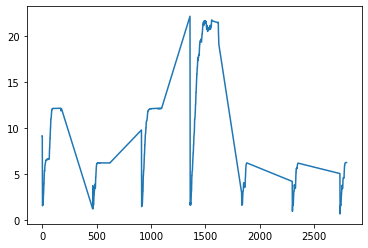

In [6]:
plt.plot(df_t['total_cpu_util'])

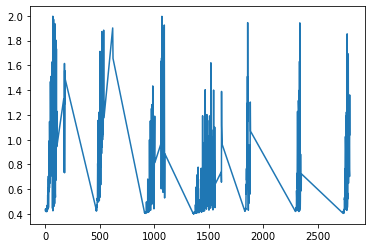

In [7]:
plt.plot(df_t['responsetime'])

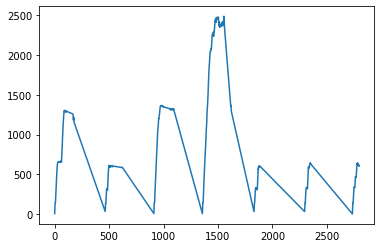

In [8]:
plt.plot(df_t['requests'])

In [9]:
X_train = df_t[[col for col in df_t.columns if col != 'responsetime']]
y_train = df_t['responsetime']
X_train = preprocessing.normalize(X_train, norm='l2')
X_test = df_ttest[[col for col in df_ttest.columns if col != 'responsetime']]
y_test = df_ttest['responsetime']
X_test = preprocessing.normalize(X_test, norm='l2')

In [10]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=7,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

# fitting the linear regression model to the dataset

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
get_cv_scores(lin_reg)

CV Mean:  0.10642641387345507
STD:  0.1996879327148941




# fitting the polynomial regression model to the dataset

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4) # plot from 2 to 5 
X_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)
get_cv_scores(lin_reg2)

CV Mean:  0.10642641387345507
STD:  0.1996879327148941




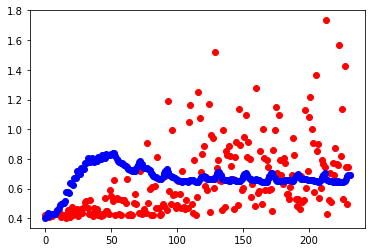

R² : -0.1428303032935474


In [13]:
#plt.scatter(X,y,color='red')
y_perd= lin_reg.predict(X_test)
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
from sklearn.metrics import r2_score, f1_score
R = r2_score(y_test, y_perd)
print ('R² :',R)

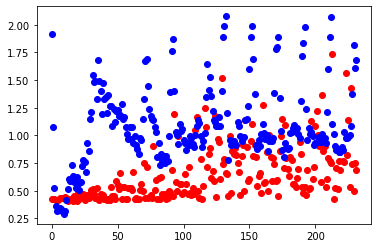

R² : -4.710549488375964


In [14]:
# plt.scatter(X,y,color='red')
y_perd= lin_reg2.predict(poly_reg.fit_transform(X_test))
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
from sklearn.metrics import r2_score
R = r2_score(y_test, y_perd)
print ('R² :',R)

# sklearn.neural_network.MLPRegressor

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


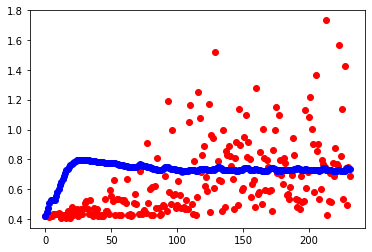

-0.13457945687497874
R² : -0.13457945687497874


In [15]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

#y_perd = regr.predict(X_eval)
#plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
#plt.scatter(range(0,len(y_test)),y_test,color='red')
#plt.show()
#print(regr.score(X_eval, y_eval))

print(regr.get_params(deep=True))

y_perd = regr.predict(X_test)
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
print(regr.score(X_test, y_test))
from sklearn.metrics import r2_score
R = r2_score(y_test, y_perd)
print ('R² :',R)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 10, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


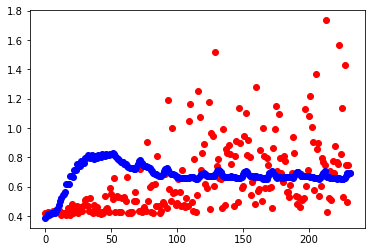

-0.1506404066833864
R² : -0.1506404066833864


In [16]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=10, max_iter=1000, batch_size=50).fit(X_train, y_train)

#y_perd = regr.predict(X_eval)
#plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
#plt.scatter(range(0,len(y_test)),y_test,color='red')
#plt.show()
#print(regr.score(X_eval, y_eval))

print(regr.get_params(deep=True))

y_perd = regr.predict(X_test)
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
print(regr.score(X_test, y_test))
from sklearn.metrics import r2_score
R = r2_score(y_test, y_perd)
print ('R² :',R)